## **주요 개념 정리**
- 합성곱 층이 이미지에서 어떤 특징을 학습했는 지 알아보기 위해 합성곱 층의 가중치와 특성 맵을 그림으로 시각화

#### **입력에 가까운 합성곱 층 (합성곱 신경망의 앞부분)**
- **이미지에서 시각적인 정보를 감지**
- 다음 층에서는 이러한 시각적인 정보를 활용하여 더 고차원적인 개념을 학습

#### **입력에서 먼 합성곱 층 (합성곱 신경망의 층이 추가될 수록)**
- 앞쪽에서 감지한 시각적인 정보를 바탕으로 더욱 **추상적인 정보를 학습**

### **keras의 함수형 API**
- 복잡한 조합의 model을 자유롭게 구성 가능
- 입력이 2개 이상이거나, 출력이 2개 이상인 경우에서는 Sequential 클래스를 사용하기 어려움
- 이번 장에서는, 입력과 합성곱층의 출력을 연결하여 특성 맵을 시각화하기 위한 용도로 함수형 api를 사용
```python
dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')
# 위의 dense 1,2 객체를 sequential 클래스의 add()메서드에 전달해도 되지만,
# layers 객체를 함수처럼 호출할 수도 있음
hidden = dense1(inputs)
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)
```
- 입력에서 출력까지 층을 호출한 결과를 이어주고, Model 클래스에 입력과 최종 출력을 지정
- **Sequential 클래스는 input layer 클래스를 자동으로 추가하고 호출해 주지만, Model 클래스에서는 수동으로 만들어서 호출해야 함**
- **inputs가 inputlayer클래스의 출력값이 되어야 함**
```python
inputs = keras.Input(shape = (784,))
```

- **전형적으로 입력은 Input()함수를 사용하여 정의하고 출력은 마지막 층의 출력으로 정의**

In [10]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
# 입력 이미지는 항상 깊이(채널) 차원이 있어야 하기에, 2차원 배열의 흑백 이미지에도 마지막에 이 채널 차원을 추가해야한다.
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)
model = keras.Sequential()
# 합성곱 - 풀링층 1
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

# 합성곱 - 풀링층 2
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))
# 3차원 특성 맵 -> 일렬로 펼치기 : 마지막에 n개의 뉴런을 가진 출력층(밀집층)에서 확률을 계산하기 때문
# 바로 출력층으로 전달하지 않고, flatten 클래스 다음 dense ->drop out -> dense -> 출력층 순으로!
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 10s 5ms/step - loss: 0.5369 - accuracy: 0.8073 - val_loss: 0.3420 - val_accuracy: 0.8732
Epoch 2/20
  23/1500 [..............................] - ETA: 6s - loss: 0.3191 - accuracy: 0.8723

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 6s 4ms/step - loss: 0.3592 - accuracy: 0.8707 - val_loss: 0.2816 - val_accuracy: 0.8967
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3124 - accuracy: 0.8864 - val_loss: 0.2587 - val_accuracy: 0.9048
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2764 - accuracy: 0.8989 - val_loss: 0.2538 - val_accuracy: 0.9046
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2532 - accuracy: 0.9065 - val_loss: 0.2405 - val_accuracy: 0.9103
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2322 - accuracy: 0.9144 - val_loss: 0.2336 - val_accuracy: 0.9145
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2174 - accuracy: 0.9198 - val_loss: 0.2246 - val_accuracy: 0.9178
Epoch 8/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1992 - accuracy: 0.9261 - val_loss: 0.2294 - val_accuracy: 0.9179
Epo

In [11]:
# CNN 모델 구조를 이미지 파일로 저장
import tensorflow as tf
from tensorflow.keras.utils import plot_model
k = plot_model(model, to_file = 'save_cnn_model.jpg', show_shapes = True, show_layer_names = True)

In [12]:
# 훈련을 마친 합성곱 신경망의 checkpoint file을 사용
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [13]:
model.layers
# 케라스 모델에 추가했던 층들이 layers 속성에 저장되어 있음
# 단, Input 객체는 레이어가 아니므로 model.layers의 일부로 표시되지 않습니다

In [33]:
# conv.weights[0] : 각 층의 가중치 / conv.weights[1] : 각 층의 절편
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
# weights 속성은 tensorflow의 다차원 배열인 Tensor 클래스의 객체

(3, 3, 1, 32) (32,)


In [15]:
# 이 가중치의 평균값은 0에 가깝고 표준편차는 0.27정도이다.
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.019701127 0.2599781


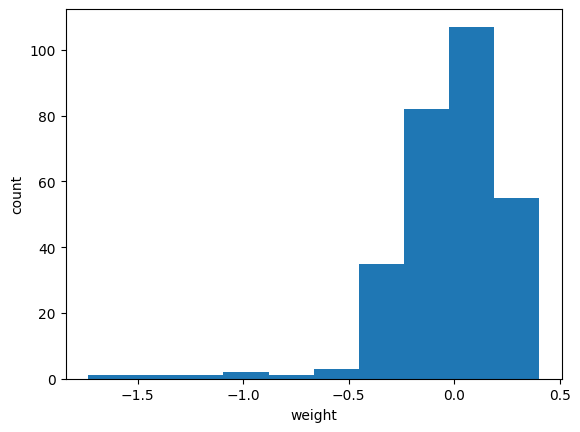

In [16]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

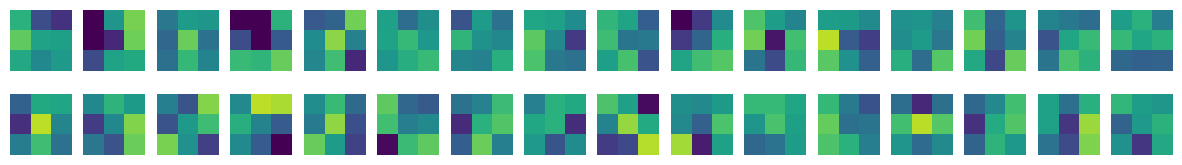

In [17]:
fig,axs = plt.subplots(2,16, figsize = (15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:, 0, i*16 + j], vmin = -0.5, vmax = 0.5)
    # vmax와 vmin을 설정해주어, 해당 범위 밖의 값들을 0.5와 -0.5로 인식하고 그래프에 나타냄
    axs[i,j].axis('off')
plt.show()

In [18]:
# 훈련을 진행하지 않아서 가중치가 학습되지 않은 model의 기본 가중치
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape= (28,28,1)))

In [19]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [20]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.001987353 0.08129027


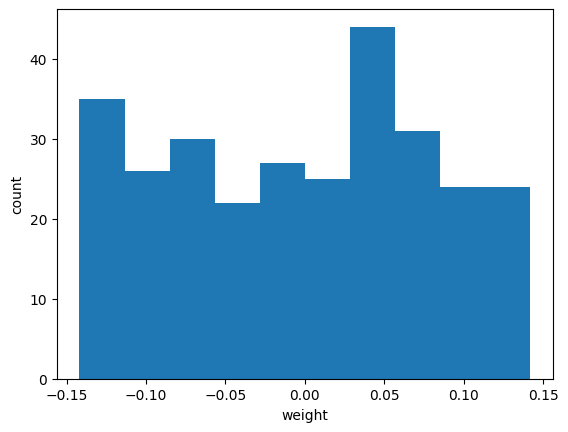

In [21]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

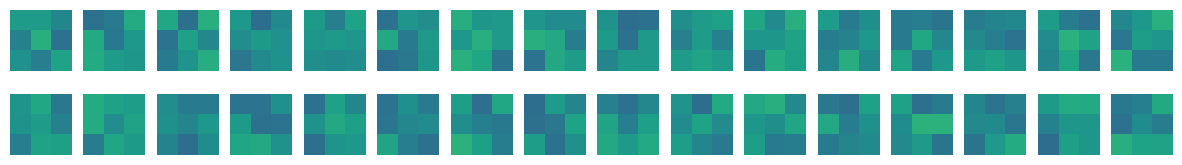

In [22]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16 +j], vmin = -0.5, vmax = 0.5)
    axs[i,j].axis('off')
plt.show()

In [23]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [24]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


In [25]:
# 함수형 api
conv_acti = keras.Model(model.input, model.layers[0].output)

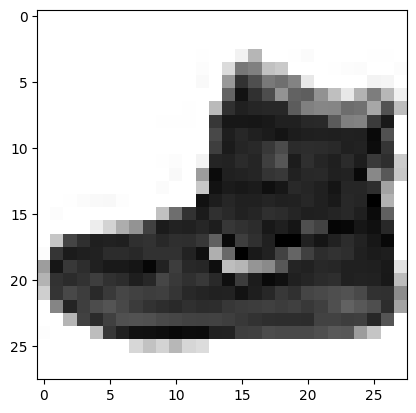

In [26]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [27]:
inputs = train_input[0:1].reshape(-1, 28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 93ms/step


In [28]:
print(feature_maps.shape)
# 첫번재 차원의 1은 batch 차원

(1, 28, 28, 32)


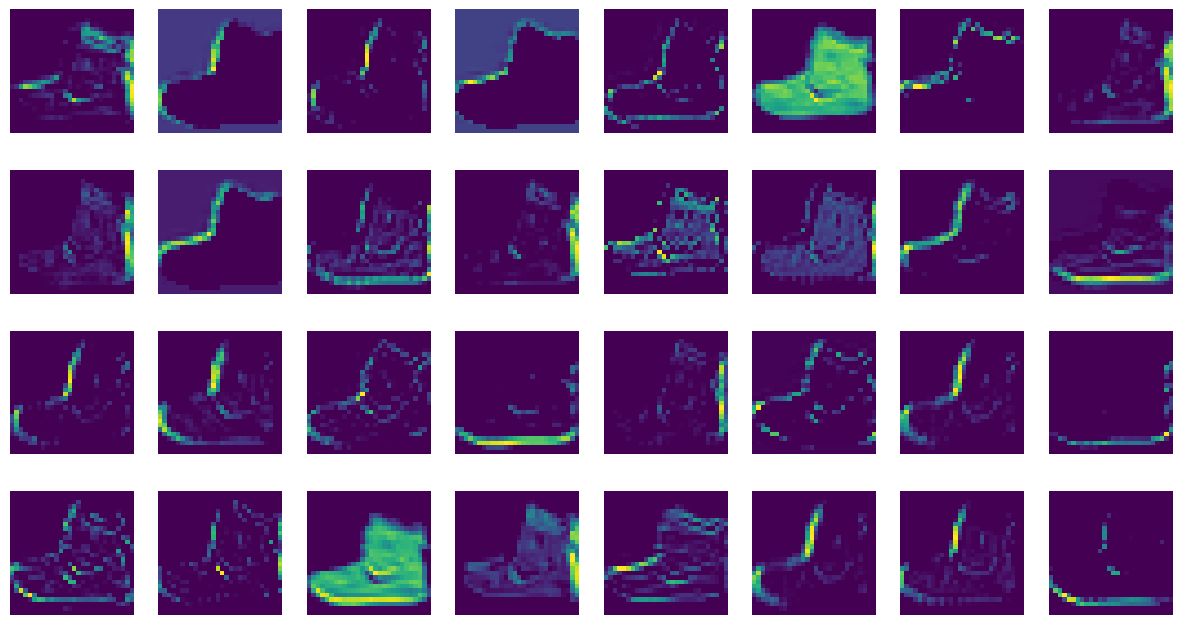

In [29]:
# 맷플롯립의 imshow()로 Conv2D층을 거친 특성맵 그려보기
fig, axs = plt.subplots(4,8, figsize = (15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [30]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

1/1 [==============================] - 0s 99ms/step
(1, 14, 14, 64)


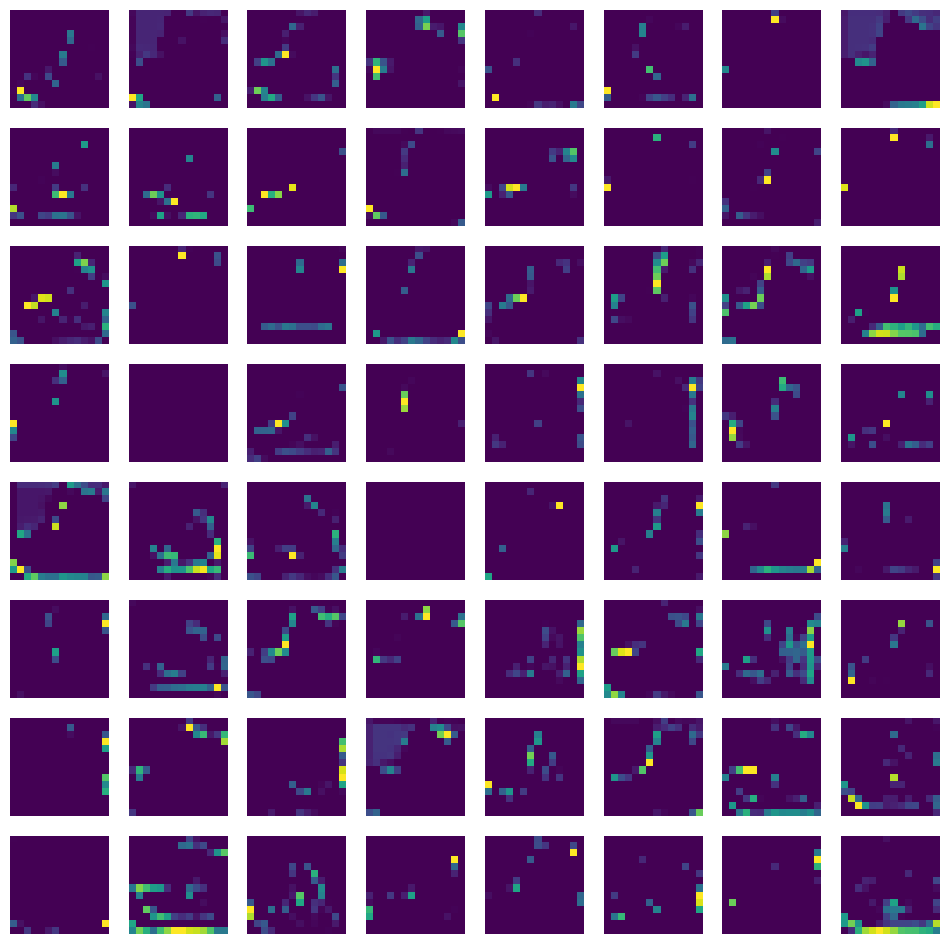

In [31]:
fig, axs = plt.subplots(8,8, figsize = (12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0, :, :, i*8 +j])
    axs[i,j].axis('off')
plt.show()